In [14]:
# import warnings
# warnings.filterwarnings("ignore")

from carla.data.catalog import CsvCatalog
from carla import MLModelCatalog
from carla.recourse_methods import Clue, Wachter
from carla.models.negative_instances import predict_negative_instances
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'..')
from recourse_util import update_dataset, train_recourse_method, predict, print_scores 

num = 10

In [59]:
dataset = CsvCatalog(
    file_path='datasets/bimodal_dataset_1.csv',
    categorical=[],
    continuous=['feature1', 'feature2'],
    immutables=[],
    target='target'
)

In [60]:
distortions = []

In [61]:
for i in range(1, 10):
    kmeans = KMeans(i).fit(dataset._df[dataset.continuous])
    distortions.append(kmeans.inertia_)

In [62]:
delta = [distortions[n] - distortions[n+1] for n in range(len(distortions) - 1)]
delta_delta = [delta[n] - delta[n+1] for n in range(len(delta) - 1)]

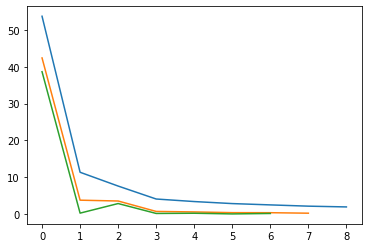

In [63]:
plt.plot(distortions)
plt.plot(delta)
plt.plot(delta_delta)
plt.show()

In [67]:
delta_delta = delta_delta/np.max(delta_delta)

In [68]:
delta_delta

array([1.00000000e+00, 5.84631290e-03, 7.32469732e-02, 3.53126877e-03,
       5.09369324e-03, 3.33205447e-04, 3.47744550e-03])